# Занятие 7

#### Лекторы: Ярослав Петрик, Полина Тихонова

*Составлено с использованием материалов курса лекций «Программирование на языке Python для сбора и анализа данных» Щурова И.В., НИУ ВШЭ*

## Извлечение данных из веб-страниц

### Загрузка веб-страницы: модуль `requests`

Если у вас не сработает строчка ниже, то сделайте `pip install requests` или `conda install requests` в командной строке (например, в *Anaconda Prompt*).

In [5]:
import requests

Модуль `requests` позволяет получать доступ к веб-страницам. Я не буду вдаваться в подробности протокола `http`, но надо понимать, что есть два распространенных способа доступа к веб-страницам: запрос типа *get* и типа *post* (хотя на самом деле видов http-запросов гораздо больше). Запрос типа get - это когда вы передаете серверу какую-то информацию в адресной строке. Например, если вы перейдете по такому адресу: https://www.google.ru/?q=python+анализ+данных, то этим вы просите гугл искать по запросу "python анализ данных вшэ". post-запрос - это когда вам нужно ввести информацию в какую-нибудь форму, например, ввести логин-пароль, который не будет отображать в адресной строке браузера.

Мы пока будем использовать get-запросы.

In [6]:
r = requests.get('http://www.miigaik.ru/')

Чтобы проверить, что страница нормально загрузилась есть команда

In [7]:
r.ok

True

Значение True говорит о том, что все прошло нормально.

In [8]:
q = requests.get('http://www.miigaik.ru/ajlfdjalsdjf')
print(q.ok)

False


Мы попытались перейти по несуществующей странице и она не загрузилась. Вернемся к успешному запросу `r`. Посмотрим на html исходник страницы командой

In [6]:
print(r.text)

    <!DOCTYPE html>
    <html>
    <head>
		<meta name="yandex-tableau-widget" content="logo=http://miigaik.ru/logoyandex.png, color=#ffffff" />
        <meta charset="utf-8">
        <title>Главная страница</title>
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta name="yandex-verification" content="e1a9b84a8a958a63" />
		<meta name="sputnik-verification" content="6it3YueB5IsSk0Ze" /> 
        <link rel="icon" href="/bitrix/templates/modern_blue_s1/favicon.ico">
        <meta name="viewport" content="width=device-width, initial-scale=1">
        <link href="//fonts.googleapis.com/css?family=PT+Sans:400,700,400italic,700italic|PT+Serif+Caption:400,400italic&amp;subset=latin,cyrillic"
              rel="stylesheet">
        <script src="//ajax.googleapis.com/ajax/libs/jquery/2.1.3/jquery.min.js"></script>
        <link rel="stylesheet" type="text/css" href="//cdn.jsdelivr.net/gh/kenwheeler/slick@1.7.1/slick/slick.css"/>
        <!-- Add the slick-theme.css if you wan

### Немного про HTML

То, что вы видите выше — HTML-страница. HTML (HyperText Markup Language) — это такой язык разметки, являющийся частным случаем стандарта SGML. Другим частным случаем SGML является XML, с которым мы еще встретимся. 

Напишем простенькую HTML-страницу. Удобнее всего это делать в каком-либо редакторе. Но я запишу ее в файл через ноутбук.

In [40]:
my_html = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset = "UTF-8">
    <title>Title</title>
</head>
<body>
<h1>Hello</h1>
<p>I'm a paragraph.</p>
<hr>
<ol>
    <li>One</li>
    <li>Two</li>
</ol>
    
</body>
</html>
'''

In [41]:
with open('my.html', 'w') as f:
    f.write(my_html)

Откройте `my.html` браузером и вы увидите простую веб-страничку. Видно что HTML разбит на специальные фрагменты, которые называются тегами. В тексте выше есть теги: `<html>`, `<head>`, `<title>` и т.д. Каждый тег отмечает какой-то кусочек веб-страницы. Тег `<title>` — это заголовок страницы. Тег `<ol>` отмечает упорядоченный список. Тег `<li>` отвечает элементу списка. Тег `<p>` — абзац (paragraph). Все перечисленные теги являются *парными*: они отмечают какой-то фрагмент текста (возможно, содержащий другие теги), помещая его между соответствующим открывающим и закрывающим тегом (например, `<li>` — открывающий тег, а `</li>` — закрывающий; всё, что между ними — это элемент списка). Исключением здесь является тег `<hr>`, который рисует горизонтальную линию (он работает и без `</hr>`).

Фактически HTML-страница представляет собой набор вложенных тегов. Можно сказать, что это дерево с корнем в теге `<html>`. У каждого тега есть потомки - те теги, которые непосредственно вложены в него. Например, у тега `<body>` потомками будут `<h1>`, `<p>`, `<hr>`, `<ol>`. Получается такое как бы генеалогическое древо.

HTML нас интересует с целью извлечения информации из такого дерева. Одним из наиболее популярных объектов для хранения информации являются таблицы, поэтмоу давайте вставим в наш файл небольшую таблицу: она обозначается тегом `<table>`, каждая строка таблицы выделяется тегом `<tr>` внутри `<table>`, а каждая ячейка — тегом `<td>` внутри `<tr>`.

In [19]:
my_html = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset = "UTF-8">
    <title>Title</title>
    <style type='text/css;'>
        table {
        border-collapse: collapse;
    }

    table, th, td {
        border: 1px solid black;
    }
    </style>
</head>
<body>
<h1>Hello</h1>
<p>I'm a paragraph.</p>
<hr>
<ol>
    <li>One</li>
    <li>Two</li>
</ol>
<table>
    <tr>
        <td>
            Cell 1
        </td>
        <td>
            Cell 2
        </td>
    </tr>
    <tr>
        <td>
            Cell 3
        </td>
        <td>
            Cell 4
        </td>
    </tr>
</table>
</body>
</html>
'''
with open('my.html', 'w') as f:
    f.write(my_html)

Вот так выглядит эта страница:

![Вот такая страничка с табличкой](http://math-info.hse.ru/f/2015-16/all-py/my-html.png)

Допустим, что она лежит где-то на удалённом сайте. Давайте загрузим ее с помощью `requests` и попробуем извлечь какую-то информацию.

In [7]:
r = requests.get('http://math-info.hse.ru/f/2015-16/all-py/my.html')

## BeautifulSoup

Для обработки веб-страниц существует множество пакетов. Проблема с HTML в том, что большинство браузеров ведет себя «прощающе», и поэтому в вебе много плохо-написанных (не по стандарту HTML) HTML-страниц. Впрочем, обработка даже не вполне корректного HTML-кода не так сложна, если под рукой есть подходящие инструменты.

Мы будем пользоваться пакетом *Beautiful Soup 4*. Он входит в стандартную поставку *Anaconda*, но если вы используете другой дистрибутив Python, возможно, вам придётся его установить вручную с помощью `pip install beautifulsoup4`.

> Пакет под названием `BeautifulSoup` — скорее всего, не то, что вам нужно. Это третья версия (*Beautiful Soup 3*), а мы будем использовать четвертую. Так что нам нужен пакет `beautifulsoup4`. Чтобы было совсем весело, при импорте нужно указывать другое название пакета — `bs4`, а импортировать функцию под названием `BeautifulSoup`. В общем, сначала легко запутаться, но эти трудности нужно преодолеть однажды, а потом будет проще.

In [9]:
from bs4 import BeautifulSoup

Чтобы использовать *Beautiful Soup*, нужно передать функции `BeautifulSoup` текст веб-страницы (в виде одной строки). Чтобы он не ругался, я также вручную указываю название парсера (той программы, которая как раз и осуществляет обработку HTML) — с целью совместимости я использую `html.parser` (он входит в поставку Python и не требует установки), но вы можете также попробовать использовать `lxml`, если он у вас установлен.

In [10]:
page = BeautifulSoup(r.text, 'html.parser')

Что теперь лежит в переменной `page`? Давайте посмотрим.

In [11]:
page

 <!DOCTYPE html>

<html>
<head>
<meta content="logo=http://miigaik.ru/logoyandex.png, color=#ffffff" name="yandex-tableau-widget"/>
<meta charset="utf-8"/>
<title>Главная страница</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="e1a9b84a8a958a63" name="yandex-verification">
<meta content="6it3YueB5IsSk0Ze" name="sputnik-verification">
<link href="/bitrix/templates/modern_blue_s1/favicon.ico" rel="icon"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="//fonts.googleapis.com/css?family=PT+Sans:400,700,400italic,700italic|PT+Serif+Caption:400,400italic&amp;subset=latin,cyrillic" rel="stylesheet"/>
<script src="//ajax.googleapis.com/ajax/libs/jquery/2.1.3/jquery.min.js"></script>
<link href="//cdn.jsdelivr.net/gh/kenwheeler/slick@1.7.1/slick/slick.css" rel="stylesheet" type="text/css">
<!-- Add the slick-theme.css if you want default styling -->
<link href="//cdn.jsdelivr.net/gh/kenwheeler/slick@1.7.1/slick/slick-theme.css" re

Мы видим, что объект `page` очень похож на строку, но, на самом деле, это не просто строка. К `page` можно делать запросы. Например:

In [12]:
page.html

<html>
<head>
<meta content="logo=http://miigaik.ru/logoyandex.png, color=#ffffff" name="yandex-tableau-widget"/>
<meta charset="utf-8"/>
<title>Главная страница</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="e1a9b84a8a958a63" name="yandex-verification">
<meta content="6it3YueB5IsSk0Ze" name="sputnik-verification">
<link href="/bitrix/templates/modern_blue_s1/favicon.ico" rel="icon"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="//fonts.googleapis.com/css?family=PT+Sans:400,700,400italic,700italic|PT+Serif+Caption:400,400italic&amp;subset=latin,cyrillic" rel="stylesheet"/>
<script src="//ajax.googleapis.com/ajax/libs/jquery/2.1.3/jquery.min.js"></script>
<link href="//cdn.jsdelivr.net/gh/kenwheeler/slick@1.7.1/slick/slick.css" rel="stylesheet" type="text/css">
<!-- Add the slick-theme.css if you want default styling -->
<link href="//cdn.jsdelivr.net/gh/kenwheeler/slick@1.7.1/slick/slick-theme.css" rel="stylesheet" typ

Мы видим то, что внутри тега `<html>` (это почти вся страница, но самая первая строчка «отрезалась»). Можно пойти вглубь и посмотреть на содержимое `<head>`.

In [13]:
page.html.head

<head>
<meta content="logo=http://miigaik.ru/logoyandex.png, color=#ffffff" name="yandex-tableau-widget"/>
<meta charset="utf-8"/>
<title>Главная страница</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="e1a9b84a8a958a63" name="yandex-verification">
<meta content="6it3YueB5IsSk0Ze" name="sputnik-verification">
<link href="/bitrix/templates/modern_blue_s1/favicon.ico" rel="icon"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="//fonts.googleapis.com/css?family=PT+Sans:400,700,400italic,700italic|PT+Serif+Caption:400,400italic&amp;subset=latin,cyrillic" rel="stylesheet"/>
<script src="//ajax.googleapis.com/ajax/libs/jquery/2.1.3/jquery.min.js"></script>
<link href="//cdn.jsdelivr.net/gh/kenwheeler/slick@1.7.1/slick/slick.css" rel="stylesheet" type="text/css">
<!-- Add the slick-theme.css if you want default styling -->
<link href="//cdn.jsdelivr.net/gh/kenwheeler/slick@1.7.1/slick/slick-theme.css" rel="stylesheet" type="text

Теперь мы видим только то, что внутри тега `<head>`. Мы можем пойти еще глубже, и получить то, что находится внутри тега `<title>`, который в свою очередь находится внутри тега `<head>` (говорят, что `<title>` является *потомком* `<head>`:

In [15]:
page.html.head.title

<title>Главная страница</title>

Впрочем, можно было бы и не писать так подробно — поскольку в документе есть только один тег `<title>`, мы бы могли не указывать, что он находится внутри `<head>`, который находится внутри `<html>`.

In [16]:
page.head.title

<title>Главная страница</title>

In [17]:
page.title

<title>Главная страница</title>

Одним из потомков `<body>` является `<table>`. Ее можно получить вот так.

In [21]:
page.body.table

Допустим, что мне нужно получить несколько элементов с одинаковым тегом, например, все строки `<tr>`. Для этого используется такой синтаксис:

In [22]:
rows = page.body.table.findAll('tr')
rows

AttributeError: 'NoneType' object has no attribute 'findAll'

In [31]:
len(rows)

2

Мы видим, что это список из двух элементов. Так что по нему можно пройти циклом.

In [32]:
for i, row in enumerate(rows):
    print(i)
    print(row)

0
<tr>
<td>
            Cell 1
        </td>
<td>
            Cell 2
        </td>
</tr>
1
<tr>
<td>
            Cell 3
        </td>
<td>
            Cell 4
        </td>
</tr>


У нас есть 2 строчки и каждая из них является таким же объектом BeautifulSoup, как и все предыдущие. Так что к ним можно применить конструкцию row.td

In [33]:
for i, row in enumerate(rows):
    print(i)
    print(row.td)

0
<td>
            Cell 1
        </td>
1
<td>
            Cell 3
        </td>


Мы видим, что если внутри тега `<row>` есть несколько тегов `<td>`, то row.td возьмет первый из них. Поэтому мы получили первый столбец. Но нас интересует не сам тег `<td>`, а строка, которая там лежит. Её можно напечатать вот так.

In [34]:
for i, row in enumerate(rows):
    print(i)
    print(row.td.string)

0

            Cell 1
        
1

            Cell 3
        


Видно, что перед строкой идут ненужные пробелы. Удалим их командой strip

In [35]:
for i, row in enumerate(rows):
    print(i)
    print(row.td.string.strip())

0
Cell 1
1
Cell 3


Давайте загрузим таблицу в виде списка списков

In [36]:
table = []
for i, row in enumerate(rows):
    table.append([])
    for cell in row.findAll('td'):
        table[-1].append(cell.string.strip())
print(table)

[['Cell 1', 'Cell 2'], ['Cell 3', 'Cell 4']]


Вот то же самое, но короче с помощью list comprehensions:

In [37]:
table = []
for row in rows:
    table.append([cell.string.strip() for cell in row.findAll('td')]) 
print(table)

[['Cell 1', 'Cell 2'], ['Cell 3', 'Cell 4']]


Или еще короче (но заковыристее):

In [38]:
table = [[cell.string.strip() for cell in row.findAll('td')] 
         for row in rows]
print(table)

[['Cell 1', 'Cell 2'], ['Cell 3', 'Cell 4']]


Заметим, что вместо `some_beautiful_soup_objec.findAll('sometag')` можно писать короче `some_beautiful_soup_object('sometag')`. Так что можно написать еще короче

In [39]:
table = [[cell.string.strip() for cell in row('td')] 
         for row in rows]
print(table)

[['Cell 1', 'Cell 2'], ['Cell 3', 'Cell 4']]


У тегов, кроме названия, бывают еще свойства — например, в строчке `<html lang="en">` мы видим свойство `lang` у тега `<html>`, имеющее значение `"en"`. Другим важным примером тега со свойствами является тег `<a>`, который создает ссылку. У него есть свойство `href`, которое хранит собственно ссылку.

> Например, строка
> `<a href="http://math-info.hse.ru/s15/m">Курс по Python</a>`
> превращается в ссылку
> <a href="http://math-info.hse.ru/s15/m">Курс по Python</a>,
> ведущую на страницу нашего курса.

Теперь представим себе, что мы хотим сделать робота, который будет ходить по веб-страницам, и переходить с одной страницы на другую по ссылкам. Тогда мы сталкиваемся с задачей извлечь из страницы все гиперссылки.
Для этого нужно найти все теги `<a>` на странице, и у всех них взять параметр `<href>`. Для начала покажем как получить свойство объекта, например, `lang` у `html`. Это делается так как будто наш объект словарь, и мы берем его значение по ключу.

In [13]:
page.html['lang']

'en'

Если запросить свойство, которое тег не имеет, то мы получим KeyError, как и со словарем.

In [12]:
page.html['strange']

KeyError: 'strange'

Так же, как у словаря, есть метод `get()`, который ничего не возвращает, если такого свойства нет. Или возвращает значение по умолчанию, определенное нами.

In [105]:
page.html.get('strange')

In [106]:
page.html.get('strange', 'no-such-tag')

'no-such-tag'

Теперь извлечем все ссылки с какого-нибудь сайта

In [25]:
r = requests.get('http://vyshka.math.ru')
page = BeautifulSoup(r.text, 'html.parser')

Вот все ссылки на нашей странице.

In [26]:
page('a')

[<a href="http://top100.rambler.ru/top100/">
 <img alt="" border="0" height="1" src="http://counter.rambler.ru/top100.cnt?188597" width="1"/></a>,
 <a href="http://math.hse.ru/">ÏÆÉÃÉÁÌØÎÏÍÕ ÓÁÊÔÕ 
       ÆÁËÕÌØÔÅÔÁ ÍÁÔÅÍÁÔÉËÉ</a>,
 <a href="http://hse.ru">îéõ ÷ûü</a>,
 <a href="http://math.hse.ru/">ÏÆÉÃÉÁÌØÎÏÇÏ ÓÁÊÔÁ ÆÁËÕÌØÔÅÔÁ</a>,
 <a href="0809/0809.html">2008/09</a>,
 <a href="0910/0910.html">2009/10</a>,
 <a href="1011/1011.html">2010/11</a>,
 <a href="1112/1112.html">2011/12</a>,
 <a href="1213/1213.php">2012/13</a>,
 <a href="1314/1314.php">2013/14</a>,
 <a href="1415/1415.php">2014/15</a>,
 <a href="1516/1516.php">2015/16</a>,
 <a href="1617/1617.php">2016/17</a>]

Как видим, метод `findAll()` (или его сокращённая форма записи в виде просто скобочек) ищет не только по непосредственным «детям» какой-то вершины (в генеалогических терминах), но и по всем потомкам.

Напечатаем сами ссылки

In [27]:
for link in page("a"):
    print(link['href'])

http://top100.rambler.ru/top100/
http://math.hse.ru/
http://hse.ru
http://math.hse.ru/
0809/0809.html
0910/0910.html
1011/1011.html
1112/1112.html
1213/1213.php
1314/1314.php
1415/1415.php
1516/1516.php
1617/1617.php




## P.S. Документация — ваш друг
 Для *Beautiful Soup* документация лежит [здесь](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), а для *requests* [здесь](http://docs.python-requests.org/en/latest/) (начните с Quickstart). 

Другой источник информации о библиотеках — всё тот же веб-поиск, который чаще всего будет выдавать ссылки на сайт с вопросами и ответами http://stackoverflow.com/. Например, набрав [how to parse table with beautifulsoup](https://www.google.ru/search?q=how+to+parse+table+with+beautifulsoup&gws_rd=cr&ei=wXaJVvzQKIfXyQO4v4PYDw) вы получите несколько ссылок на stackoverflow с примерами кода. Кстати, на stackoverflow можно задавать и свои вопросы — но прежде нужно убедиться, что на них не ответили раньше.

## Geopandas

Чтобы установить geopandas, необходимо выполнить в командной строке: *pip install geopandas*, либо в Anaconda Promt: *conda install geopandas*

In [4]:
import geopandas
import pandas as pd
pd.options.display.max_rows = 4

In [21]:
import matplotlib.pyplot as plt

In [32]:
data = geopandas.read_file('Wien.shp')

In [36]:
data.drop(0)

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry
1,Wien,AT001L,11100,Continuous Urban Fabric (S.L. > 80%),2009,505.624195,13570.102585,"POLYGON ((4798917.564102984 2774786.800435496,..."
2,Wien,AT001L,11100,Continuous Urban Fabric (S.L. > 80%),2009,315.912231,4645.189767,"POLYGON ((4798410.952773677 2775221.000136176,..."
...,...,...,...,...,...,...,...,...
46945,Wien,AT001L,50000,Water bodies,2009,747.553408,34056.272189,"POLYGON ((4789841.291887319 2845946.800081857,..."
46946,Wien,AT001L,50000,Water bodies,2009,705.669683,31454.311977,"POLYGON ((4786573.658708335 2847146.602771149,..."


In [27]:
data.head(3)

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry
0,Wien,AT001L,11100,Continuous Urban Fabric (S.L. > 80%),2009,245.575883,3265.766386,"POLYGON ((4799826.098616621 2773995.445373429,..."
1,Wien,AT001L,11100,Continuous Urban Fabric (S.L. > 80%),2009,505.624195,13570.102585,"POLYGON ((4798917.564102984 2774786.800435496,..."
2,Wien,AT001L,11100,Continuous Urban Fabric (S.L. > 80%),2009,315.912231,4645.189767,"POLYGON ((4798410.952773677 2775221.000136176,..."


In [33]:
data.geometry.area

0         3267.490468
1        13577.324734
             ...     
46945    34075.135242
46946    31472.232783
Length: 46947, dtype: float64

In [37]:
bounds = data.bounds
bounds

,minx,miny,maxx,maxy
0,4.799741e+06,2.773981e+06,4.799826e+06,2.774033e+06
1,4.798835e+06,2.774734e+06,4.798964e+06,2.774935e+06
...,...,...,...,...
46945,4.789761e+06,2.845944e+06,4.789982e+06,2.846189e+06
46946,4.786392e+06,2.847069e+06,4.786607e+06,2.847311e+06


In [38]:
data

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry
0,Wien,AT001L,11100,Continuous Urban Fabric (S.L. > 80%),2009,245.575883,3265.766386,"POLYGON ((4799826.098616621 2773995.445373429,..."
1,Wien,AT001L,11100,Continuous Urban Fabric (S.L. > 80%),2009,505.624195,13570.102585,"POLYGON ((4798917.564102984 2774786.800435496,..."
...,...,...,...,...,...,...,...,...
46945,Wien,AT001L,50000,Water bodies,2009,747.553408,34056.272189,"POLYGON ((4789841.291887319 2845946.800081857,..."
46946,Wien,AT001L,50000,Water bodies,2009,705.669683,31454.311977,"POLYGON ((4786573.658708335 2847146.602771149,..."


In [41]:
 data = data[((bounds['minx'] < 4800000) & (bounds['maxx'] > 4780000)
             & (bounds['miny'] < 2810000) & (bounds['maxy'] > 2800000))]

In [43]:
data = data[data['ITEM'] != 'Water bodies']

(2800000, 2810000)

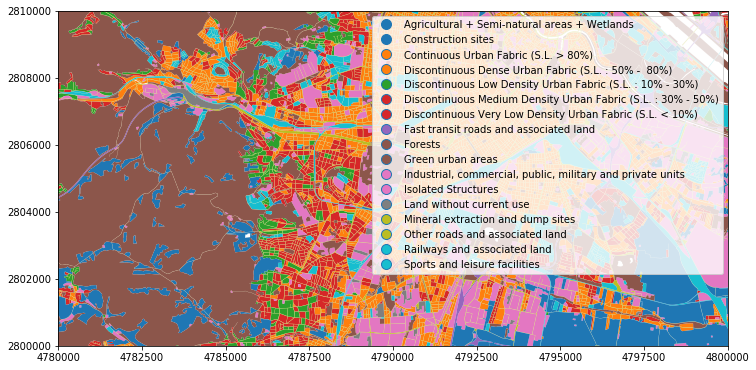

In [45]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
data.plot(column='ITEM', legend=True, ax=ax)
ax.set_xlim(4780000, 4800000)
ax.set_ylim(2800000, 2810000)

In [46]:
green_areas = data[data['ITEM']=='Green urban areas']